<hr>

# <center>**PROMO TOOL** - prototype code</center>

<hr>

Loading needed libraries

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd
import pyarrow.parquet as pq
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
from sklearn.metrics import mean_squared_error

## Baseline Model

Loading data for item 38

In [3]:
X38 = pd.read_parquet("C:/Users/vvrhovec/Veronika/kodovi/zajednicki/parquet/item_X38.parquet")
X39 = pd.read_parquet("C:/Users/vvrhovec/Veronika/kodovi/zajednicki/parquet/item_X39.parquet")
X40 = pd.read_parquet("C:/Users/vvrhovec/Veronika/kodovi/zajednicki/parquet/item_X40.parquet")
X41 = pd.read_parquet("C:/Users/vvrhovec/Veronika/kodovi/zajednicki/parquet/item_X41.parquet")
X57 = pd.read_parquet("C:/Users/vvrhovec/Veronika/kodovi/zajednicki/parquet/item_X57.parquet")

In [4]:
X38 = X38.rename(columns={"redna_cena":"regular_price", "akcijska_cena":"discounted_price","n_trgovin":"no_stores","kol":"amount"})
X38 = X38.rename_axis(['item','date'])

X39 = X39.rename(columns={"redna_cena":"regular_price", "akcijska_cena":"discounted_price","n_trgovin":"no_stores","kol":"amount"})
X39 = X39.rename_axis(['item','date'])

X40 = X40.rename(columns={"redna_cena":"regular_price", "akcijska_cena":"discounted_price","n_trgovin":"no_stores","kol":"amount"})
X40 = X40.rename_axis(['item','date'])

X41 = X41.rename(columns={"redna_cena":"regular_price", "akcijska_cena":"discounted_price","n_trgovin":"no_stores","kol":"amount"})
X41 = X41.rename_axis(['item','date'])

X57 = X57.rename(columns={"redna_cena":"regular_price", "akcijska_cena":"discounted_price","n_trgovin":"no_stores","kol":"amount"})
X57 = X57.rename_axis(['item','date'])

In [5]:
X57.head()

regular_price  discounted_price  no_stores  amount
item date                                                          
57   2016-01-02          0.081             0.081        103    73.0
     2016-01-03          0.082             0.082        101     4.0
     2016-01-04          0.080             0.080        102    34.0
     2016-01-05          0.082             0.082        101    27.0
     2016-01-06          0.080             0.080        101    61.0

In [6]:
train_df = pd.DataFrame()
test_df = pd.DataFrame()

In [7]:
train_df = pd.DataFrame(index =[38,39,40,41,57], columns =['baseline']) 
test_df = pd.DataFrame(index =[38,39,40,41,57], columns =['baseline']) 

In [8]:
def baseline (df):
    X_train, X_test = train_test_split(df, shuffle = False, test_size = 0.2)

    X_train_mean = X_train['amount'].mean()
    
    predictions_train = [X_train_mean] * X_train.shape[0] 
    predictions_test = [X_train_mean] * X_test.shape[0] 
    
    train_df.loc[(df.index[0][0]),'baseline'] = np.sqrt(mean_squared_error(X_train['amount'], predictions_train))
    test_df.loc[(df.index[0][0]),'baseline'] = np.sqrt(mean_squared_error(X_test['amount'], predictions_test)) 
    
    fig1, ax1 = plt.subplots()
    string='X'+str(df.index[0][0])
    ax1.set_title(string)
    string +='.png'
    #ax1.get_yaxis().get_major_formatter().set_scientific(False)
    ax1.scatter(X_test['amount'], predictions_test)
    fig1.savefig(string)

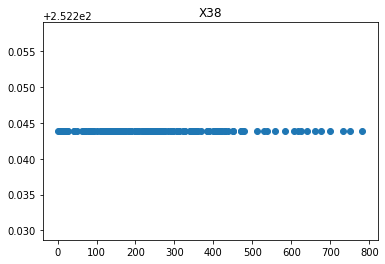

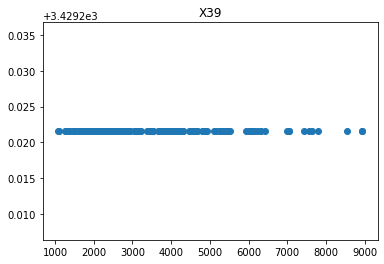

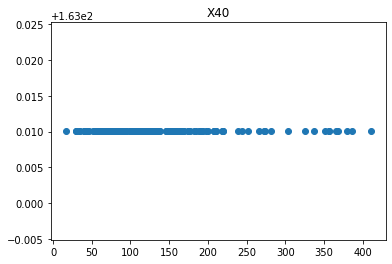

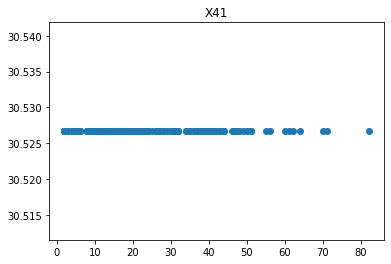

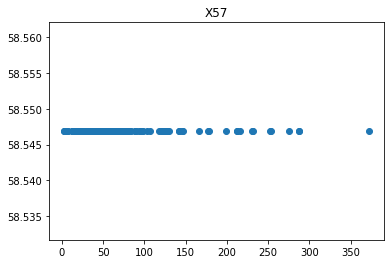

In [9]:
baseline(X38)
baseline(X39)
baseline(X40)
baseline(X41)
baseline(X57)

In [10]:
train_df

,baseline
38,153.446
39,1834.3
40,122.175
41,15.7706
57,37.0379


In [11]:
test_df

,baseline
38,170.329
39,1719.16
40,87.5328
41,16.4768
57,65.3809


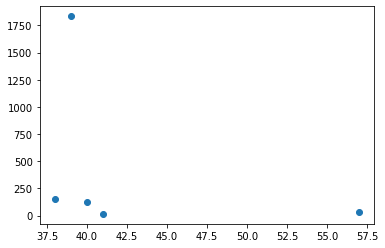

In [12]:
plt.scatter(train_df.index.values, train_df['baseline'] ) 

In [13]:
from funkcije import scale,ColumnExtractor,DummyTransformer,DFFeatureUnion, ZeroFillTransformer,DFStandardScaler,dayName,holiday
from funkcije import log,log2,log10,kroz,korijen,IQ,devetBani,STD,nista

from sklearn.externals import joblib

C:\Users\vvrhovec\AppData\Local\Continuum\miniconda3\envs\okolina\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [14]:
ALFA = joblib.load('ALFA.sav')
BETA = joblib.load('BETA.sav')
GAMA = joblib.load('GAMA.sav')
DELTA = joblib.load('DELTA.sav')

In [15]:
skaliranje = [log, log2, log10, kroz, korijen, nista]
outlieri = [IQ, devetBani, STD, nista]
pipe = [ALFA, BETA, GAMA, DELTA]

In [16]:
from math import e, sqrt
nacin = []

In [29]:
def SO(table):
    MIN_J = 5000      #    postavimo neki veliki min
    NACIN_J = ''      #    prazan string koji ce nam reci kako smo dosli do rezultata
    MIN_D = 5000
    NACIN_D = ''
    DULJINA = len(table.index)
    
    a = 0
    b = 0
    c = 0
    d = 0
    f = 0
    
    
    #print('----------------------------------------------------OVO JE POCETAK-----------------------------------------------------')
    #print(table.head)
    #tablica=table
    for i in range(len(skaliranje)):                
        for z in range (len(outlieri)):
            tablica = table.copy()    # radimo na tablici,table cuvamo
            tablica_train = tablica[:-1]
            tablica_test  = tablica[tablica.shape[0]-1:]

            
            proces1 = skaliranje[i]()
            proces2 = outlieri[z]()
            
            
            tablica_train = proces1.fit_transform(tablica_train)
            tablica_test = proces1.transform(tablica_test) 
            proces2.fit(tablica_train)
            tablica_train = proces2.transform(tablica_train)
            tablica_test = proces2.transform(tablica_test)           
            X_test = tablica_test.drop('amount', axis=1)
            y_test = tablica_test['amount']
            X_train = tablica_train.drop('amount', axis=1)
            y_train = tablica_train['amount']
            
            for j in range(len(pipe)):
                #print('tu sam--->',i,'-----',j)#----------------------------AKO ZELIS PROVJERAVAT ZA JEDNOG
                string = (str(skaliranje[i]))[17:-2] + '+' + (str(outlieri[z]))[17:-2] + '+' + str(j)   
                pipe[j].fit(X_train,y_train)
                predictions = pipe[j].predict(X_test)
                
                #print(predictions[:10])
                
                if i == 0:                                    # VRACANJE TESTA SUKLADNO SKALIRANJU     
                    #print("............................................. ",predictions[:5])
                    predictions = np.power(e,predictions)          # <-----------------------------e je jednak nula
                    #print(e)
                    #print("............................................. ",predictions[:5])
                    
                    if a == 0:  
                        #print("............................................. ",y_test[:5])
                        y_test = np.power(e,y_test)
                        #print("............................................. ",y_test[:5])
                        a += 1
                    
                    
                if i == 1:
                    predictions = np.power(2,predictions)
                    #y_test = np.power(2,y_test)
                    if b == 0:  
                        #print("............................................. ",y_test[:5])
                        y_test = np.power(2,y_test)
                        #print("............................................. ",y_test[:5])
                        b += 1
                if i == 2:
                    predictions = np.power(10,predictions)
                    #y_test = np.power(10,y_test)
                    if c == 0:  
                        #print("............................................. ",y_test[:5])
                        y_test = np.power(10,y_test)
                        #print("............................................. ",y_test[:5])
                        c += 1
                if i == 3:
                    predictions = np.power(predictions,-1)
                    #y_test = np.power(y_test,-1)
                    if d == 0:  
                        #print("............................................. ",y_test[:5])
                        y_test = np.power(y_test,-1)
                        #print("............................................. ",y_test[:5])
                        d += 1
                if i == 4:
                    predictions = np.power(predictions,2)
                    #y_test = np.power(y_test,2)
                    if f == 0:  
                        #print("............................................. ",y_test[:5])
                        y_test = np.power(y_test,2)
                        #print("............................................. ",y_test[:5])
                        f += 1
                #print('tu sam--->',i,'---',z,'--',j,'posto podataka:',len(tablica.index)/DULJINA)    #DA VIDIS KOLIKO IMA PODATAKA
                rms = sqrt(mean_squared_error(y_test, predictions))
    
                #test_df[string] = 0
                #print(table.index[0][0],string)    ### PROMJENI STRING IMA 4 NACINA
                
                test_df.loc[(table.index[0][0]),string] = rms
                #test_df.loc[(df.index[0][0]),string] = rms
    
                
    
                #print ('tu sam',i,z,j,'---------->',rms)#----------------------------AKO ZELIS PROVJERAVAT ZA KOLIKO JE RMS
                if (DULJINA - len(tablica.index)) / DULJINA < 0.1:
                    if rms < MIN_J:
                        MIN_J = rms
                        NACIN_J = str(i) + '+' + str(z) + '+' + str(j)
                if (DULJINA - len(tablica.index)) / DULJINA < 0.2:
                    if rms < MIN_D:
                        MIN_D = rms
                        NACIN_D = str(i) + '+' + str(z) + '+' + str(j)
        #print('----------------------------------------------KRAJ LOOPA-----------------------------------------------')
    PATH = (str(skaliranje[int(NACIN_J[0])]))[17:-2] + '+' + (str(outlieri[int(NACIN_J[2])]))[17:-2] + '+' + str(NACIN_J[4])   
    nacin.append(str(table.index[0][0])+': '+PATH)
    test_df.loc[(table.index[0][0]),'put'] = NACIN_J
    print ('Najmanju greska koju dobijemo, a da sacuvamo barem 90% podataka je :',MIN_J,',a dobijemo ju na ovaj nacin:',NACIN_J)
    print ('Najmanju greska koju dobijemo, a da sacuvamo barem 80% podataka je :',MIN_D,', a dobijemo ju na ovaj nacin:',NACIN_D,'\n')    

In [30]:
pd.options.mode.chained_assignment = None  # default='warn'
SO(X38)
SO(X39)
SO(X40)
SO(X41)
SO(X57)

Najmanju greska koju dobijemo, a da sacuvamo barem 90% podataka je : 65.8168008857777 ,a dobijemo ju na ovaj nacin: 3+0+1
Najmanju greska koju dobijemo, a da sacuvamo barem 80% podataka je : 65.8168008857777 , a dobijemo ju na ovaj nacin: 3+0+1 



ValueError: Found array with 0 sample(s) (shape=(0, 4)) while a minimum of 1 is required by StandardScaler.

In [31]:
test_df

,baseline,log+IQ+0,log+IQ+1,log+IQ+2,log+IQ+3,log+devetBani+0,log+devetBani+1,log+devetBani+2,log+devetBani+3,log+STD+0,...,nista+devetBani+3,nista+STD+0,nista+STD+1,nista+STD+2,nista+STD+3,nista+nista+0,nista+nista+1,nista+nista+2,nista+nista+3,put
38,170.329,82.377910,85.252785,82.377910,82.377910,216.464739,214.675142,216.464739,216.464739,233.169774,...,109.304800,98.305255,100.107679,101.257715,101.257715,106.862874,124.824772,111.544451,111.544451,3+0+1
39,1719.16,2772.542488,2790.098973,2774.445914,2802.622084,4058.290645,4068.420767,4065.743915,4065.743915,3129.004827,...,1110.364831,1029.015398,1015.453238,1018.625277,1018.625277,1350.215235,1292.199658,1312.905774,1312.905774,5+2+1
40,87.5328,75.859991,74.621654,74.991458,74.991458,117.784643,118.103967,117.696091,117.696091,117.320809,...,71.869587,55.574163,55.578382,55.617609,55.617609,75.358951,74.828015,74.828015,74.828015,5+2+0
41,16.4768,12.241893,12.223434,12.236925,12.236925,25.862531,25.862987,25.861053,25.861053,27.101361,...,10.454604,9.976718,9.996274,9.994670,9.994670,12.021180,11.957510,11.959053,11.959053,5+2+0
57,65.3809,40.867141,40.704627,40.839241,40.839241,48.115638,48.386759,47.437805,47.437805,49.702924,...,22.427235,24.984873,24.179162,24.179162,24.179162,58.822680,58.772555,58.822680,58.822680,5+1+3


In [32]:
test_df.min(axis=1)

38      65.816801
39    1015.453238
40      55.574163
41       9.976718
57      22.427235
dtype: float64

In [21]:
nacin

['38: nista+STD+0',
 '39: nista+STD+1',
 '40: nista+STD+0',
 '41: nista+STD+0',
 '57: nista+devetBani+3']

In [22]:
#from sklearn.pipeline import Pipeline

In [23]:
"""pipeline_38 = Pipeline([('days',dayName()),('praznici',holiday()),('features', DFFeatureUnion([('numerics', Pipeline([
            ('extract', ColumnExtractor(NUM_FEATS)),
            ('zero_fill', ZeroFillTransformer())
            ])),('categoricals', Pipeline([('extract', ColumnExtractor(CAT_FEATS)),
                                           ('dummy', DummyTransformer())]))])),('classifier', LinearRegression())])
                        
"""                

"pipeline_38 = Pipeline([('days',dayName()),('praznici',holiday()),('features', DFFeatureUnion([('numerics', Pipeline([\n            ('extract', ColumnExtractor(NUM_FEATS)),\n            ('zero_fill', ZeroFillTransformer())\n            ])),('categoricals', Pipeline([('extract', ColumnExtractor(CAT_FEATS)),\n                                           ('dummy', DummyTransformer())]))])),('classifier', LinearRegression())])\n                        \n"

In [24]:
#tablica = pd.read_parquet("C:/Users/vvrhovec/Veronika/kodovi/zajednicki/parquet/item_X38.parquet")

In [25]:
#tablica = pipeline_38.fit_transform(tablica)

In [ ]:
c